In [1]:
# data process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import pint

In [3]:
ureg = pint.UnitRegistry()

In [22]:
with open('f1.dat') as f:
    data = []
    tmp = []
    for line in f:
        line = line.strip()
        if line == '':
            data.append(np.array(tmp))
            tmp = []
            continue
        x, y = line.strip().split()
        tmp.append((float(x), - float(y)))
    data.append(np.array(tmp))

In [23]:
data[0]

array([[ 294.75, -503.25],
       [ 295.  , -200.5 ],
       [1214.  , -503.  ],
       [1082.  , -604.  ]])

In [24]:
zero_px = data[0][0]
y_max_px = data[0][1,1] - zero_px[1]
x_max_px = data[0][3,0] - zero_px[0]

In [25]:
lin_setp = 6/569.5

In [26]:
x_max_px * lin_setp

8.294117647058822

In [27]:
def scele_log_10(v, d_min, d_max):
    d_min = np.log10(d_min)
    d_max = np.log10(d_max)
    return 10**(v * (d_max - d_min) + d_min)

In [28]:
def scale_linear(v, d_min, d_max):
    return v * (d_max - d_min) + d_min

In [29]:
coordinates = []
for d in data[1:]:
    d = (d - zero_px)/(x_max_px, y_max_px)
    x = scale_linear(d[:,0], .8, 1.4)
    y = scele_log_10(d[:,1], 10**-3, 1)
    coordinates.append(np.vstack([x,y]).T)

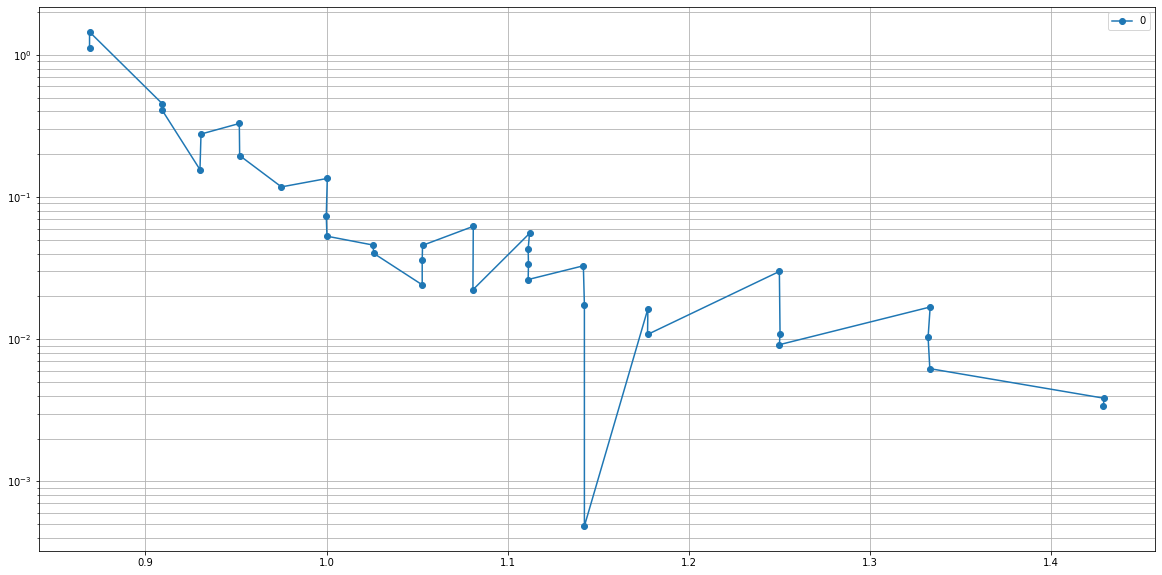

In [32]:
fig, ax = plt.subplots(1,1, figsize=(20,10), sharex=False)
for idx, d in enumerate(coordinates):
    ax.plot(d[:,0],d[:,1], 'o-', label=idx)
ax.set_yscale('log')
ax.grid(which='both')
ax.legend()

In [33]:
import pandas as pd

In [34]:
dfs = []
for a, b in zip(coordinates, ['bern_kax_2k']):
    tmp = a.copy()
    x = tmp[:,0] / ureg.kelvin
    y = tmp[:,1] * ureg.m/ureg.sec
    y = y.to(ureg.nanometer/ureg.picosec).magnitude
    x =(1000/x).to(ureg.kelvin).magnitude
    tmp[:,0]= x
    tmp[:,1]= y
    df = pd.DataFrame(tmp, columns=['t','v'])
    df['pot'] = b
    dfs.append(df)

In [35]:
df = pd.concat(dfs, ignore_index=True)

In [36]:
df

t             v          pot
0   1150.529777  1.120846e-03  bern_kax_2k
1   1150.529777  1.448852e-03  bern_kax_2k
2   1099.664758  4.525395e-04  bern_kax_2k
3   1099.664758  4.060579e-04  bern_kax_2k
4   1075.110959  1.557410e-04  bern_kax_2k
5   1074.450662  2.770827e-04  bern_kax_2k
6   1050.577167  3.287972e-04  bern_kax_2k
7   1050.366911  1.956567e-04  bern_kax_2k
8   1025.532469  1.177649e-04  bern_kax_2k
9    999.555612  1.350426e-04  bern_kax_2k
10  1000.127041  7.335006e-05  bern_kax_2k
11   999.746016  5.299012e-05  bern_kax_2k
12   975.043349  4.594757e-05  bern_kax_2k
13   974.500217  4.006892e-05  bern_kax_2k
14   949.809978  2.411730e-05  bern_kax_2k
15   949.809978  3.595332e-05  bern_kax_2k
16   949.638118  4.568623e-05  bern_kax_2k
17   925.033782  6.216688e-05  bern_kax_2k
18   925.196850  2.226622e-05  bern_kax_2k
19   899.200457  5.546426e-05  bern_kax_2k
20   899.817122  4.290769e-05  bern_kax_2k
21   899.662876  3.376672e-05  bern_kax_2k
22   899.817122  2.627169e-05  bern_kax_2k
23   875.792635  3.281727e-05  bern_kax_2k
24   875.354423  1.752267e-05  bern_kax_2k
25   875.354423  4.846006e-07  bern_kax_2k
26   849.290685  1.636337e-05  bern_kax_2k
27   849.428140  1.079023e-05  bern_kax_2k
28   799.969515  2.995475e-05  bern_kax_2k
29   799.725721  1.085195e-05  bern_kax_2k
30   799.969515  9.145114e-06  bern_kax_2k
31   750.011909  1.683679e-05  bern_kax_2k
32   750.655542  1.030890e-05  bern_kax_2k
33   750.119104  6.204878e-06  bern_kax_2k
34   699.622306  3.842738e-06  bern_kax_2k
35   699.808880  3.408927e-06  bern_kax_2k

In [37]:
df.to_csv('f1.csv')